In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from nltk.util import ngrams
from nltk import FreqDist
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

df = pd.read_table('../data/18 Popeyes Louisiana Kitchen.pdf-all_items_item_12.txt', header=None, delimiter=None)
df = df.rename(columns={0:'Text'}).copy()
print(df)

text_list = df['Text'].tolist()
stop_words = set(stopwords.words('english'))

                                                  Text
0                                              ITEM 12
1                                            TERRITORY
2    Target Reservation Agreement and Multiple Targ...
3    You may only develop your Popeyes Restaurant a...
4    TRA that site will be included at the time you...
..                                                 ...
124  leasing similar products or services under a d...
125                            to do so in the future.
126                               4871-7453-9410, v. 4
127                                            Item 13
128                                            03/2024

[129 rows x 1 columns]


## Bag of Words

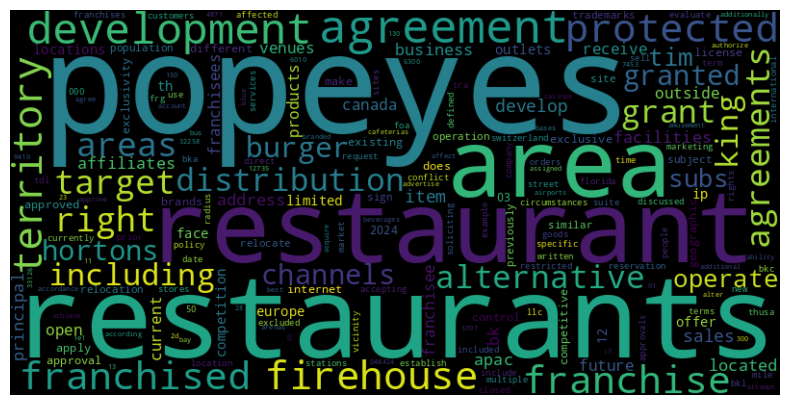

In [2]:
vectorizer = CountVectorizer(stop_words='english')
text_vector = vectorizer.fit_transform(text_list)

word_freq = text_vector.sum(axis=0)

word_freq_dict = dict(zip(vectorizer.get_feature_names_out(), word_freq.A1))

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq_dict)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Bigrams


2-gram (Bigram) Frequencies:
Popeyes Restaurants: 10
Protected Area: 8
Franchised Restaurant: 7
Firehouse Subs®: 7
Popeyes Restaurant: 6
business address: 6
channels distribution: 5
Alternative Venues: 5
Franchise Agreement: 5
may face: 4
Development Agreement: 4
within outside: 4
principal business: 4
Burger King®,: 4
King®, Tim: 4
receive exclusive: 3
competitive brands: 3
relocate Franchised: 3
Development Agreements: 3
Restaurants within: 3
facilities (including: 3
Burger King®: 3
Tim Hortons: 3
Hortons restaurants,: 3
address BK: 3
Hortons® Firehouse: 3
Target Reservation: 2
Reservation Agreement: 2
may develop: 2
develop Popeyes: 2
Franchised Restaurants: 2
also right: 2
sell products: 2
direct marketing: 2
marketing sales: 2
vicinity Franchised: 2
Franchised Restaurant.: 2
Restaurant may: 2
face competition: 2
franchisees, outlets: 2
outlets own,: 2
distribution competitive: 2
prior written: 2
geographic area: 2
Venues (as: 2
approvals granted: 2
Development Agreement.: 2
Franc

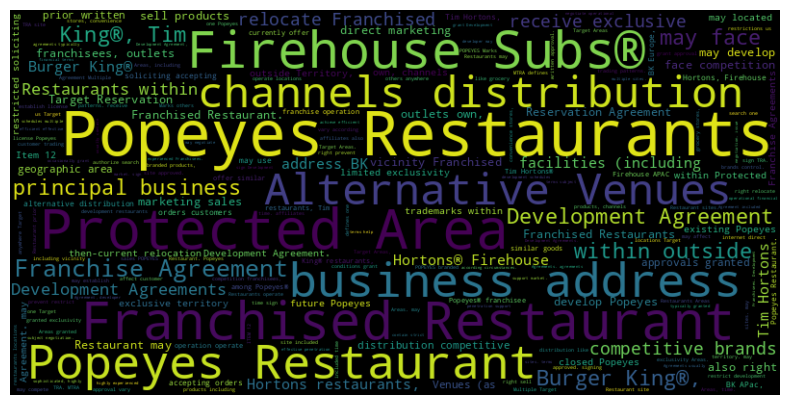

In [3]:
n = 2  # Bigrams
all_bigrams = []

for text in text_list:
    tokens = [token for token in text.split() if token.lower() not in stop_words]
    bigrams = list(ngrams(tokens, n))
    all_bigrams.extend(bigrams)

bigram_freq = FreqDist(all_bigrams)

# Print 2-gram (Bigram) frequencies
print("\n2-gram (Bigram) Frequencies:")
for bigram, freq in sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{' '.join(bigram)}: {freq}")

bigram_str_freq = {f"{' '.join(bigram)}": freq for bigram, freq in bigram_freq.items()}
bigram_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(bigram_str_freq)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## N-grams


N-gram Frequencies (in this case 3) :
principal business address: 4
Burger King®, Tim: 4
relocate Franchised Restaurant: 3
Tim Hortons restaurants,: 3
business address BK: 3
Hortons® Firehouse Subs®: 3
Target Reservation Agreement: 2
direct marketing sales: 2
vicinity Franchised Restaurant.: 2
may face competition: 2
franchisees, outlets own,: 2
channels distribution competitive: 2
distribution competitive brands: 2
Alternative Venues (as: 2
Popeyes Restaurants within: 2
Restaurants within outside: 2
within outside Territory,: 2
receive exclusive territory: 2
Agreement. may face: 2
own, channels distribution: 2
closed Popeyes Restaurant: 2
restricted soliciting accepting: 2
soliciting accepting orders: 2
accepting orders customers: 2
Tim Hortons, Firehouse: 2
Burger King® restaurants,: 2
restaurants, Tim Hortons: 2
offer similar goods: 2
King®, Tim Hortons®: 2
Tim Hortons® Firehouse: 2
Reservation Agreement Multiple: 1
Agreement Multiple Target: 1
Multiple Target Reservation: 1
may de

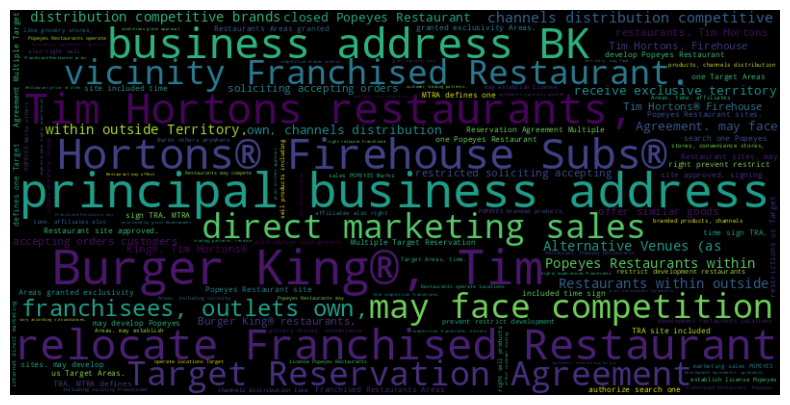

In [4]:
n = 3  #N-grams
all_bigrams = []

for text in text_list:
    tokens = [token for token in text.split() if token.lower() not in stop_words]
    bigrams = list(ngrams(tokens, n))
    all_bigrams.extend(bigrams)

bigram_freq = FreqDist(all_bigrams)

# Print N-gram frequencies
print(f"\nN-gram Frequencies (in this case 3) :")
for bigram, freq in sorted(bigram_freq.items(), key=lambda x: x[1], reverse=True):
    print(f"{' '.join(bigram)}: {freq}")

bigram_str_freq = {f"{' '.join(bigram)}": freq for bigram, freq in bigram_freq.items()}
bigram_wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(bigram_str_freq)

# Display the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(bigram_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## TF IDF


TF-IDF - Combined Word Scores:
popeyes: 0.0545
restaurants: 0.0528
restaurant: 0.0474
agreement: 0.0426
territory: 0.0416
development: 0.0389
area: 0.0353
franchised: 0.0341
franchise: 0.0335
protected: 0.0295
firehouse: 0.0283
item: 0.0271
areas: 0.0266
right: 0.0249
agreements: 0.0248
target: 0.0246
grant: 0.0227
distribution: 0.0226
subs: 0.0213
hortons: 0.0213
operate: 0.0211
king: 0.0209
granted: 0.0207
alternative: 0.0207
channels: 0.0204
tim: 0.0203
burger: 0.0200
12: 0.0199
develop: 0.0194
including: 0.0193
future: 0.0181
sales: 0.0174
03: 0.0164
2024: 0.0164
control: 0.0160
franchisee: 0.0158
located: 0.0152
franchisees: 0.0150
affiliates: 0.0147
competition: 0.0147
open: 0.0145
face: 0.0140
receive: 0.0136
outside: 0.0136
outlets: 0.0130
products: 0.0130
current: 0.0129
locations: 0.0127
venues: 0.0126
facilities: 0.0123
apac: 0.0119
brands: 0.0117
competitive: 0.0117
address: 0.0116
business: 0.0116
principal: 0.0113
approved: 0.0112
bk: 0.0110
license: 0.0105
limited: 0.01

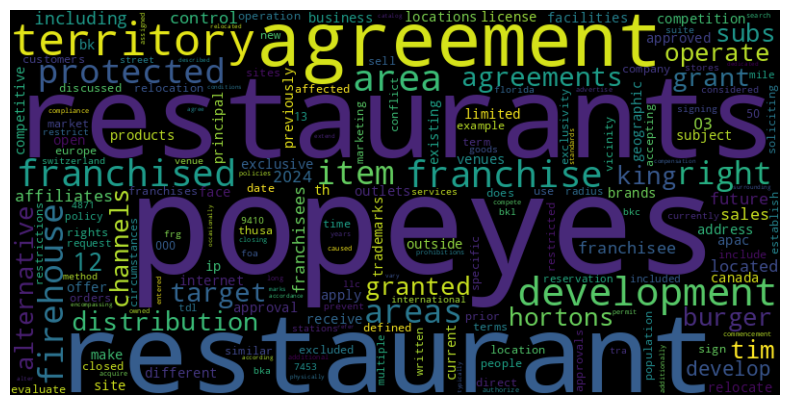

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit(df['Text'])

X_tfidf = tfidf_vectorizer.transform(df['Text'])

tfidf_scores_all = X_tfidf.mean(axis=0).A1
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_scores_all))

print("\nTF-IDF - Combined Word Scores:")
for word, score in sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {score:.4f}")

wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(tfidf_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Import all 50 text file

In [79]:
!pip install gensim transformers

In [6]:
#Import necessary packages
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch
import glob
import pandas as pd
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from nltk.tokenize import word_tokenize
from gensim.parsing.preprocessing import remove_stopwords
import matplotlib.pyplot as plt
import numpy as np
import re

In [7]:
file_path = '../data/*.txt'
all_files = glob.glob(file_path)

data = []

for file in all_files:
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        data.append(content)

combined_df = pd.DataFrame(data, columns=['Text'])

print(combined_df)

                                                 Text
0   Item 12\nTerritory\n\nMcDonald’s franchises co...
1   Item 12\n\nTERRITORY\n\nThe License Agreement ...
2   ITEM 12\nTERRITORY\n\nYou will operate your We...
3   ITEM 12\nTERRITORY\nYou will not receive an ex...
4   Item 12\n\nTERRITORY\n\n\nYou will not receive...
5   ITEM 12:\nTERRITORY\nThe Franchise Agreement\n...
6   ITEM 12\nTERRITORY\n\n\nThe Franchise Agreemen...
7   ITEM 12\nTERRITORY\nWe or any affiliate may es...
8   ITEM 12\nTERRITORY\nFranchise Agreement.\n\nTh...
9   ITEM 12\nTERRITORY\nTarget Reservation Agreeme...
10  Item 12: Territory\nRights under Franchise Agr...
11  ITEM 12\nTERRITORY\nFranchise Agreement\nUnder...
12  Item 12). We consider traffic patterns, demogr...
13  ITEM 12:\nTERRITORY\nThe Development Agreement...
14  ITEM 12.\nTERRITORY\nIf you wish to open one o...
15  ITEM 12\nTERRITORY\n\n\nYou will not receive a...
16  ITEM 12\nTERRITORY\nYour Territory will be spe...
17  ITEM 12\nTERRITORY\n\nYo

## Conduct topic modelling

## Frequency Based Method for All text file

In [8]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_vectorizer.fit(combined_df['Text']) 

X_tfidf = tfidf_vectorizer.transform(combined_df['Text'])

tfidf_scores_all = X_tfidf.mean(axis=0).A1
tfidf_scores = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_scores_all))

print("\nTF-IDF - Combined Word Scores:")
for word, score in sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True):
    print(f"{word}: {score:.4f}")



TF-IDF - Combined Word Scores:
agreement: 0.1259
development: 0.1232
restaurant: 0.1094
area: 0.1078
franchise: 0.1074
territory: 0.0853
restaurants: 0.0816
operate: 0.0591
protected: 0.0543
right: 0.0509
location: 0.0466
store: 0.0465
services: 0.0442
center: 0.0431
rights: 0.0401
affiliates: 0.0383
products: 0.0375
business: 0.0370
franchisees: 0.0360
distribution: 0.0347
marks: 0.0345
sell: 0.0322
delivery: 0.0311
including: 0.0299
designated: 0.0292
unit: 0.0290
franchised: 0.0290
new: 0.0286
outside: 0.0281
similar: 0.0274
grant: 0.0265
sales: 0.0264
businesses: 0.0255
channels: 0.0251
service: 0.0251
develop: 0.0250
traditional: 0.0249
company: 0.0249
market: 0.0246
time: 0.0245
non: 0.0244
license: 0.0242
fitness: 0.0239
site: 0.0239
item: 0.0235
use: 0.0220
customers: 0.0218
open: 0.0214
trademarks: 0.0213
described: 0.0213
locations: 0.0212
franchisee: 0.0212
establish: 0.0211
franchises: 0.0211
trade: 0.0209
firehouse: 0.0200
located: 0.0199
proprietary: 0.0199
ihop: 0.0196


## Embedding Method for all text file

In [9]:
def clean_text(text):
    text = remove_stopwords(text.lower())
    text = re.sub(r'[^\w\s]|[_]+', '', text)
    text = re.sub(r'\bitem\b|\b12\b', '', text)
    return text

file_tokens = []
for text in combined_df['Text']:
    cleaned_text = clean_text(text)
    tokens = cleaned_text.split()
    file_tokens.append(tokens)

word2vec_model = Word2Vec(sentences=file_tokens, vector_size=100, window=5, min_count=1, workers=4)

def get_doc_embedding(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)
    return np.mean(word_vectors, axis=0)

doc_embeddings = np.array([get_doc_embedding(tokens, word2vec_model) for tokens in file_tokens])

# Calculate inertia to find optimal number of clusters
inertia = []
K = range(1, min(15, len(file_tokens)))
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(doc_embeddings)
    inertia.append(kmeans.inertia_)

second_derivative = np.diff(inertia, 2)
optimal_n = np.argmin(second_derivative) + 2
optimal_n = max(2, min(optimal_n, len(file_tokens) // 2))
print(f"Optimal number of clusters: {optimal_n}")


# Perform K-means clustering with optimal number of topics
kmeans = KMeans(n_clusters=optimal_n, random_state=42, n_init=10)
doc_labels = kmeans.fit_predict(doc_embeddings)
combined_df['Topic'] = doc_labels

# Display result
print("\nTopic Assignments for Files:")
for topic in range(optimal_n):
    files_in_topic = combined_df[combined_df['Topic'] == topic].index.tolist()
    formatted_files = ', '.join([f"File {file}" for file in files_in_topic])
    print(f"Topic #{topic + 1}: {formatted_files}")

Optimal number of clusters: 11

Topic Assignments for Files:
Topic #1: File 0
Topic #2: File 8, File 11, File 14, File 30, File 31, File 33
Topic #3: File 12, File 20, File 21, File 26, File 38, File 42, File 44
Topic #4: File 4, File 32, File 35, File 37, File 39, File 47
Topic #5: File 3, File 19, File 28, File 45
Topic #6: File 22, File 23
Topic #7: File 18, File 49
Topic #8: File 40, File 43, File 48
Topic #9: File 9, File 13, File 25, File 27, File 34, File 36, File 46
Topic #10: File 2, File 6, File 10, File 15, File 16, File 17, File 24, File 29, File 41
Topic #11: File 1, File 5, File 7


## Question Answering (Analyze whether the franchisee is offered an exclusive territory. )

In [31]:
import pandas as pd
from transformers import BertTokenizer, BertForQuestionAnswering

# Initialize the BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

question = "Does the franchisee have an exclusive territory?"

def answer_question(question, context):
    inputs = tokenizer(question, context, return_tensors='pt', max_length=512, truncation='only_second')

    with torch.no_grad():
        outputs = model(**inputs)

    start_scores = outputs.start_logits
    end_scores = outputs.end_logits

    start_index = torch.argmax(start_scores)
    end_index = torch.argmax(end_scores)

    answer_tokens = inputs['input_ids'][0][start_index:end_index + 1]
    answer = tokenizer.decode(answer_tokens, skip_special_tokens=True)

    context_lower = context.lower()
    
    if 'no' in answer or 'not' in answer or answer is None or 'not granted' in context_lower or 'not receive an exclusive territory' in context_lower:
        return "You will not receive an exclusive territory"
    elif 'granted' in answer or 'receive' in answer or 'granted an exclusive territory' in context_lower:
        return "You will receive an exclusive territory"

        
# Load the text files
file_path = '../data/*.txt'
all_files = glob.glob(file_path)

data = []
file_names = []

for file in all_files:
    with open(file, 'r', encoding='utf-8') as f:
        content = f.read()
        data.append(content)
        file_names.append(file.split('/')[-1]) 

combined_df = pd.DataFrame(data, index=file_names, columns=['Text'])

answers = [answer_question(question, doc) for doc in combined_df['Text']]

results_df = pd.DataFrame({
    'File Name': combined_df.index,
    'Answer': answers
})

results_df

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


,File Name,Answer
0,data\1 McDonald's.pdf-all_items_item_12.txt,You will not receive an exclusive territory
1,data\10 Taco Bell.pdf-all_items_item_12.txt,You will not receive an exclusive territory
2,data\11 Wendy's.pdf-all_items_item_12.txt,You will not receive an exclusive territory
3,data\12 Pizza Hut.pdf-all_items_item_12.txt,You will not receive an exclusive territory
4,data\13 REMAX.pdf-all_items_item_12.txt,You will not receive an exclusive territory
5,data\14 Dunkin'.pdf-all_items_item_12.txt,You will not receive an exclusive territory
6,data\15 Keller Williams.pdf-all_items_item_12.txt,You will not receive an exclusive territory
7,data\16 Tim Hortons.pdf-all_items_item_12.txt,You will not receive an exclusive territory
8,data\17 Panera Bread.pdf-all_items_item_12.txt,You will not receive an exclusive territory
9,data\18 Popeyes Louisiana Kitchen.pdf-all_item...,You will not receive an exclusive territory


In [28]:
import pandas as pd
import numpy as np

answers_file_path = "../data/Item 12_Answers.csv"
answers_df = pd.read_csv(answers_file_path)

combined_df = results_df
combined_df["File Name"] = combined_df["File Name"].str.replace(r"^data\\", "", regex=True)

for index, row in combined_df.iterrows(): 
    if row['Answer'] == 'You will not receive an exclusive territory':
        combined_df.at[index, 'Result'] = 'No'
    elif row['Answer'] == 'You will receive an exclusive territory':
        combined_df.at[index, 'Result'] = 'Yes'

merged_df = combined_df.merge(answers_df, on="File Name", how="inner")

# Checking accuracy between "Result" and "Original Decision"
accuracy = (merged_df["Result"] == merged_df["Original Decision"]).mean()

print(f"Accuracy: {accuracy:.2%}")

Accuracy: 100.00%
